<a href="https://colab.research.google.com/github/kirath2205/Machine-Learning-Plant-seedling/blob/main/Plant_seedlings_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img

In [2]:
def define_generators():
  height = 250
  width = 250
  batch_size = 64
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=360,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.5,
        vertical_flip=True,
        horizontal_flip=True,
        validation_split=0.2, # change to use validation instead of training on entire training set
    )

  train_generator = train_datagen.flow_from_directory(
        directory='Documents/train',
        target_size=(width, height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode="categorical",
        subset='training',
    )

  validation_generator = train_datagen.flow_from_directory(
        directory='Documents/train',
        target_size=(width, height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode="categorical",
        subset='validation',
    )

  test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

  test_generator = test_datagen.flow_from_directory(
        directory='Documents/',
        classes=['test'],
        target_size=(width, height),
        batch_size=1,
        color_mode='rgb',
        shuffle=False,
        class_mode='categorical')

  return train_generator, validation_generator, test_generator

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D , Dropout
from keras import regularizers

tf.keras.backend.clear_session()

def define_model_vgg16_improvement(image_shape,total_classes):
  print(image_shape[2])

  model = Sequential()
  weight_decay = 0.0005
  learning_rate = 0.1
  lr_decay = 1e-6
  lr_drop = 20
  
  model.add(Conv2D(64, (3, 3), padding='same',input_shape=image_shape,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  #model.add(Dropout(0.3))

  model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  #model.add(Dropout(0.3))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Dropout(0.5))
  model.add(Dense(total_classes))
  model.add(Activation('softmax'))
  sgd = keras.optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
  model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  
  return model

In [4]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def train_model_vgg16(model , train_generator,validation_generator,epochs=10,batch_size=128):
  
  callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint('best_model_vgg16_plant_seedlings', monitor='val_accuracy', verbose=1, save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau( factor = 0.9, patience = 3, min_lr = 0.000001, verbose = 1 ),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 40)
  ]
  history=model.fit(train_generator, epochs = epochs, batch_size = batch_size,callbacks = callbacks, verbose = 1,validation_data = validation_generator)
  return history

In [5]:

train_generator, validation_generator, test_generator  = define_generators()
improved_model = define_model_vgg16_improvement((250, 250 , 3),12)
history = train_model_vgg16(improved_model , train_generator , validation_generator , epochs=250 , batch_size = 64)

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.
Found 794 images belonging to 1 classes.
3
Epoch 1/250
60/60 [==============================] - ETA: 0s - loss: 100.3854 - accuracy: 0.1386
Epoch 00001: val_accuracy improved from -inf to 0.10876, saving model to best_model_vgg16_plant_seedlings
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: best_model_vgg16_plant_seedlings/assets
60/60 [==============================] - 76s 1s/step - loss: 100.3854 - accuracy: 0.1386 - val_loss: 132497.5156 - val_accuracy: 0.1088 - lr: 0.1000
Epoch 2/250
60/60 [==============================] - ETA: 0s - loss: 116.1353 - accuracy: 0.1917
Epoch 00002: val_accuracy did not improve from 0.10876
60/60 [==============================] - 67s 1s/step - loss: 116.1353 - accuracy: 0.1917 - val_loss: 168.6592 - val_accuracy: 0.0834 - lr: 0.1000
Epoch 3/250
60/60 [==============================] - ETA: 0s - los

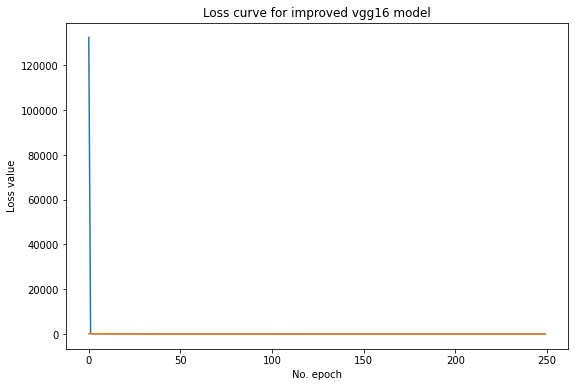

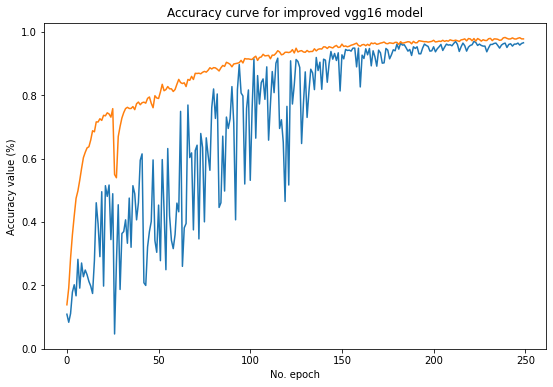

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9,6))
plt.plot(history.history['val_loss'],label='Test loss')
plt.plot(history.history['loss'],label='Train loss')
plt.title('Loss curve for improved vgg16 model')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.figure(figsize = (9,6))
plt.plot(history.history['val_accuracy'],label = 'Test accuracy')
plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.title('Accuracy curve for improved vgg16 model')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()